# Desarrollo Tarea 1 - Introducción a la Bioinformática
***
### Nombres de los integrantes:
    - Iñaki Oyarzun M.
    - Vicente Alvarez A.


***
Import de librerías previas




In [58]:
import numpy 
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import Levenshtein

### Pregunta 1
***
A partir de la siguiente combinación entre los nombres de los integrantes, se llega a la siguiente consulta a realizar como proteína:

`VINAKIALVARESVN` (Vinaki Alvarezun)

A partir de la siguiente configuración se procede a realizar la ejecución del algoritmo:

![Parámetros del algoritmo](content/ConfigAlgoritmo.PNG)

Obteniendo los siguientes resultados:

![Resultados de BLAST](content/ResultadosBLAST.PNG)

a) De ello, seleccionando la primera proteína hallada se procede a generar los dos dot plots asociados, tomando en cuenta la misma distancia del largo de la query a al derecha y a la izquierda, obteniendo lo siguiente:

* match: ikakialvareknlvpfsvn
* match + extension derecha e izquierda: stpnssgtlltyildddgr**ikakialvareknlvpfsvn**alenvkstsytyrlpsvet




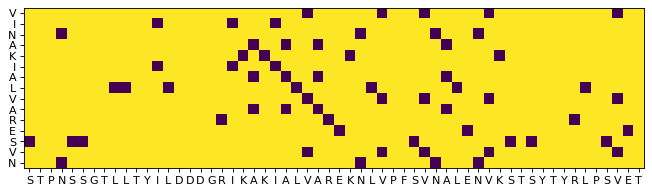

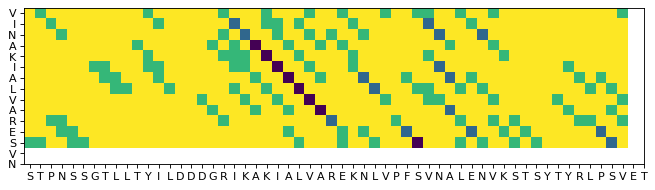

In [ ]:
# Función que genera un dotplot a partir de dos secuencias.
# Obtenido de StackOverflow, realizado por John Coleman y complementado por Nick
# https://stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python

seq1 = "VINAKIALVARESVN"
seq2 = ("stpnssgtlltyildddgrikakialvareknlvpfsvnalenvkstsytyrlpsvet").upper()
def delta(x,y):
    return 0 if x == y else 1
def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))
def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]
def generateDotplot(seqx, seqy, k):
    plt.figure(figsize=(10,15), dpi=80)
    dotplot=plt.imshow(numpy.array(makeMatrix(seqx,seqy,k)))
    xt=plt.xticks(numpy.arange(len(list(seqy))),list(seqy))
    yt=plt.yticks(numpy.arange(len(list(seqx))),list(seqx))
    plt.show()

generateDotplot(seq1, seq2,1)
generateDotplot(seq1, seq2,3)




***
b) El alineamiento que entregó BLAST fue el siguiente:

![Alineamiento BLAST](content/alineamiento.PNG)

De lo anterior se muestra que la diferencia entre la query realizada para BLAST y el segmento de la proteína se encuentra en un solo gap de tamaño 6 y un reemplazo de letra (Segunda letra K por una N)

***
c) Es una pyruvyl-transferasa, una enzima envuelta en biosintesis de polimeros asociados a peptidoglycanos, perteneciente a una familia de proteinas, como lo indica el nombre. Esta información se apoya en el siguiente [link](https://www.ebi.ac.uk/interpro/entry/InterPro/IPR007345/).

Su estructura se puede observar en el modelo generado en este [sitio](https://www.uniprot.org/uniprotkb/A0A060I400/entry). Se observa que en gran parte del modelo de la estructura se tiene un alto porcentaje de certeza en cuanto a cómo es realmente.

***
d) Pertenece a una bacteria Bacteroidaceae. Estas son una clase de bacterias perteneciente al filo Bacteroidetes. 
Son medioambientales y comensales, a veces patógenos.
![Bacteroidaceae](content/375px-BacteroidesFragilis_Gram.jpg)

Luego, [investigando](https://www.uniprot.org/uniprotkb/A0A060I400/entry#names_and_taxonomy) sobre otros organismos que ha sido encontrada la proteína se pueden observar que está en las bacterias del tipo Rhizobium, las cuales son de la clase Alphaproteobacterias, estas bacterias realizan el proceso de fijación de nitrógeno, Viviendo en simbiosis con las plantas en su raíz (leguminosas).

![Rhizobium](content/Rhizobium.png)


***
e) 
[link1](https://www.ncbi.nlm.nih.gov/protein/AIC28562.1).

[link2](http://getentry.ddbj.nig.ac.jp/getentry/na/CP006986) BUSCAR AIC28562.

[link3](https://www.uniprot.org/uniprotkb/A0A060I400/entry#sequences)


***
f) Los datos vienen de 2 trabajos de Xie,F. El primero es *A highly-resolved spatial and functional map of the ruminant gastrointestinal microbiome*, el cuál no fué publicado. El segundo es una entrada directa al *Laoratorio de Microbiologia Gastrointestinal de la Universidad Agricultural de Nanjing*.

***
g) Los siguientes 5 matches son de organismos distintos:


1.   **Bacteroidales bacterium** (beta-glucosidase BglX), asociada a organismos de la flora intestinal.
2.   **Candidatus Woesearchaeota archaeon** (TCP-1/cpn60 chaperonin family protein, partial), son parte de un nuevo orden candidato del dominio de Archeas, de las cuales, recientemente solo se han hallado en la naturaleza. Sin embargo no ha sido posible ser cultivadas.
3.   **Shinella sp. AETb1-6** (FGGY-family carbohydrate kinase) Asociado a entidades que participan en el desarrollo de las plantas por lo general o procesos que ocurren dentro de ellas.
4.   **Gilliamella sp. Pas-s25** (DUF945 family protein), Familia de bacterias asociadas a enfermedades, de importancia médica.
5.   **Alphaproteobacteria bacterium** (OmpH family outer membrane protein), de la investigación realizada, se concluye que se encuentra en un conjunto de bacterias del tipo proteobacterias, que son parte de un conjunto mucho mas grande de patógenos.

Se ha podido observar o relacionar que las especies 3 y 5 observadas son cercanas al segundo origen encontrado del primer match. Donde por ejemplo se relaciona con la especie 3 en cuanto a pertenecer a procesos de las plantas. Y con la número 5 por pertenecer a la misma clase de las Alphaproteobacterias.

![Arbol circular](content/circular_tree.jpg)

### Pregunta 2
***
A continuación se generá una función encargada de realizar lo mencionado, por otra parte, para el cálculo de la distancia de Levenshtein, se hará uso de una libreria ofrecida en python llamada "Levenshtein", la cual permite realizar este cálculo.

In [65]:
#Genera la secuencia aleatoria de 200 bases
def generateAlienSeq():
    res = ""
    for x in range(200):
        res+=random.choice(["A","C","G","T","B","D"])
    return res 

#Crea una mutacion de las 200 bases posibles
def mutateAlienSeq(seq):
    res = seq
    tipo = random.choice(["insert","del","swap"])
    index = random.choice(range(len(seq)))
    if(tipo == "insert"):
        res = res[:index]+random.choice(["A","C","G","T","B","D"])+res[index:]
    elif(tipo == "del"):
        res = res[:index]+res[index+1:]
    else:
        tomodify = ["A","C","G","T","B","D"]
        tomodify.remove(res[index])
        res = res[:index]+random.choice(tomodify)+res[index+1:]
    return res


***

**a)** Se realizará el cálculo solicitado para luego ser graficado en la forma de un histograma.


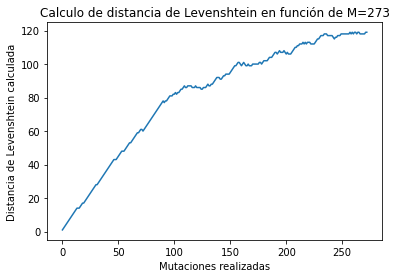

In [78]:
# Se almacenan los resultados y se genera la secuencia inicial
res = []
M = random.choice(range(301))
init = generateAlienSeq()
init0 = init
for x in range(M):
    temp = mutateAlienSeq(init)
    res.append(Levenshtein.distance(init0,temp))
    init = temp

plt.plot(range(M),res)
plt.xlabel("Mutaciones realizadas")
plt.ylabel("Distancia de Levenshtein calculada (D)")
plt.title("Calculo de distancia de Levenshtein en función de M="+str(M))
plt.show()


***

**b)** Para este caso, se hace uso de la misma metodología anterior, pero para este caso con dos secuencias.

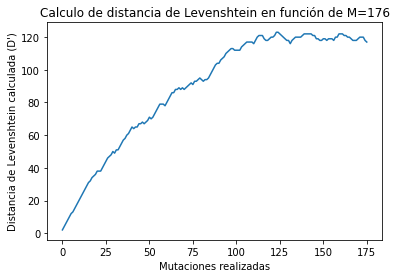

In [83]:
resb = []
Mb = random.choice(range(301))
seq = generateAlienSeq()
seq2= seq
for x in range(Mb):
    seq = mutateAlienSeq(seq)
    seq2 =mutateAlienSeq(seq2)
    resb.append(Levenshtein.distance(seq,seq2))

plt.plot(range(Mb),resb)
plt.xlabel("Mutaciones realizadas")
plt.ylabel("Distancia de Levenshtein calculada (D')")
plt.title("Calculo de distancia de Levenshtein en función de M="+str(Mb))
plt.show()


***

**c)** En primer lugar se generarán pares de secuencias y se almacenarán sus distancias, para luego generar y presentar el histograma.

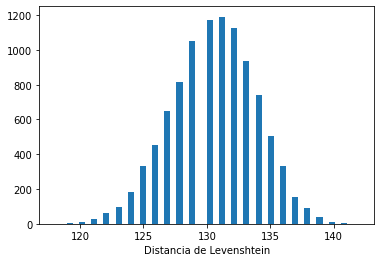

Media:  130.5302
Desviación estándar:  3.334229740134894


In [87]:
resc = []
for x in range(10000):
    resc.append(Levenshtein.distance(generateAlienSeq(),generateAlienSeq()))

plt.hist(resc, bins=50)
plt.xlabel("Distancia de Levenshtein")
plt.show()

print("Media: ",np.mean(resc))
print("Desviación estándar: ", np.std(resc))

***

**d)** POR PREGUNTAR